In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.integrate import odeint
import py_analyze_tools.tools as pat
import numpy as np

# Frobenius norm with L1 penalty regression

In [2]:
traj = pat.Trajectory("../generate/simple_trajectory_.h5")
traj.counts = traj.counts[:45*500]
traj.add_fusion(0, 1, 2)
traj.add_fission(2, 0, 1)
traj.add_conversion(0, 1)
traj.add_conversion(0, 3)
traj.add_conversion(3, 0)
xi = traj.estimate(.003)

max counts = 6000.0, min nonzero counts = 1.0


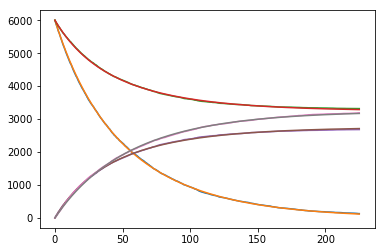

In [3]:
def fun(data, _):
    theta = np.array([f(data) for f in traj.thetas])
    return np.matmul(xi, theta)

num_solution = odeint(fun, traj.counts[0], np.arange(0, traj.n_time_steps*.01, .01))
for i in range(traj.n_species):
    plt.plot(np.arange(0, traj.n_time_steps*.01, .01), traj.counts[:,i])
    plt.plot(np.arange(0, traj.n_time_steps*.01, .01), num_solution[:, i])

# Cross validation

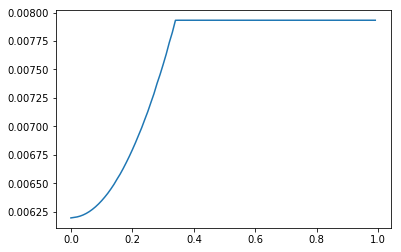

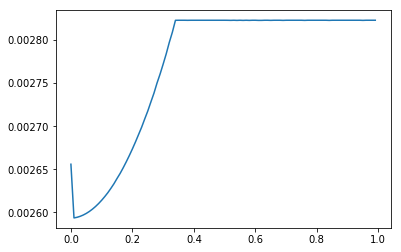

In [4]:
cv = pat.CV(traj)
alphas, cost_learn, cost_test = cv.calculate_cost(np.arange(0,1,.01), range(0, 6000), range(6000, traj.n_time_steps))
plt.plot(alphas, cost_learn)
plt.show()
plt.plot(alphas, cost_test)

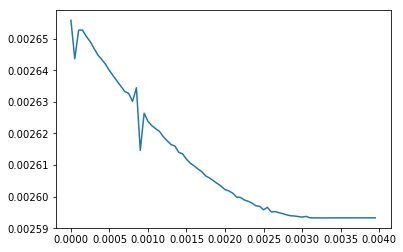

In [5]:
alphas, cost_learn, cost_test = cv.calculate_cost(np.arange(0., 0.004, .00005), range(0, 6000), range(6000, traj.n_time_steps))
plt.plot(alphas, cost_test)

# Trajectory with back reaction

In [28]:
traj = pat.Trajectory("../generate/simple_trajectory_2.h5")
traj.counts = traj.counts[:60*500]
traj.add_fusion(0, 1, 2)
traj.add_fission(2, 0, 1)
traj.add_conversion(0, 1)
traj.add_conversion(0, 3)
traj.add_conversion(3, 0)
xi = traj.estimate(.003)
print("estimated coefficients: %s" % xi)
traj.rate_info(xi[0])

max counts = 6000.0, min nonzero counts = 1.0
estimated coefficients: [  2.00371380e-06   9.55107372e-05   0.00000000e+00   9.15022558e-03
   9.13330846e-03]
erban chapman rate (per volume): 0.06848398371542153
lasso fitted rate (per counts): 2.0037138029216628e-06
lasso fitted rate (per volume): 0.006762534084860612


(0.068483983715421526, 2.0037138029216628e-06, 0.0067625340848606122)

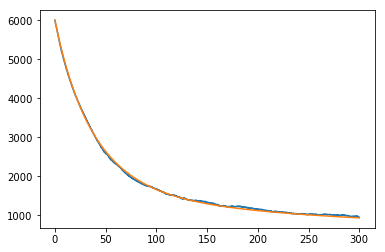

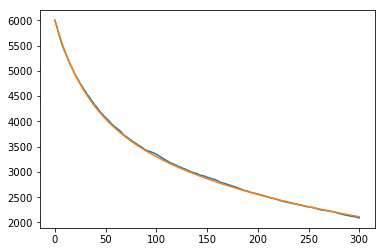

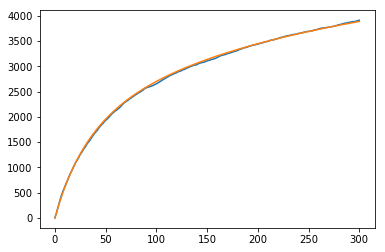

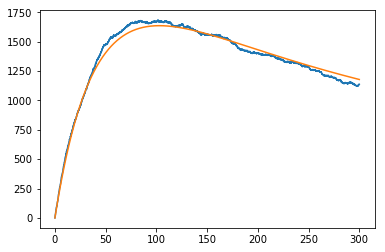

In [29]:
def fun(data, _):
    theta = np.array([f(data) for f in traj.thetas])
    return np.matmul(xi, theta)

num_solution = odeint(fun, traj.counts[0], np.arange(0, traj.n_time_steps*.01, .01))
for i in range(traj.n_species):
    plt.plot(np.arange(0, traj.n_time_steps*.01, .01), traj.counts[:,i])
    plt.plot(np.arange(0, traj.n_time_steps*.01, .01), num_solution[:, i])
    plt.show()

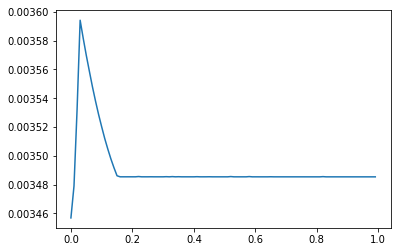

In [30]:
cv = pat.CV(traj)
alphas, cost_learn, cost_test = cv.calculate_cost(np.arange(0,1,.01), range(0, traj.n_time_steps//2), range(traj.n_time_steps//2, traj.n_time_steps))
plt.plot(alphas, cost_test)